In [93]:
#Starting code

#Step 1. import all the necessary libraries

import math
import pandas as pd
import numpy as np
import calendar
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import dates
from datetime import datetime

from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

####**Dataset #1**

In [94]:
# Step 2. Importing the dataset and reading the Excel file into a dataframe
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path = "/content/drive/MyDrive/Equitable Justice Lab/(RB) per-capita-ocean-plastic-waste (Dataset).xlsx"
PlasticWastePC = pd.read_excel(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Step 3: Understand the variables of our dataset
PlasticWastePC.head()


,Entity,Code,Year,Mis_Plastic_waste_(kg)
0,Africa,NaN,2019,0.059823
1,Albania,ALB,2019,0.543214
2,Algeria,DZA,2019,0.134114
3,Angola,AGO,2019,0.027023
4,Antigua and Barbuda,ATG,2019,0.020619


In [96]:
# Step 4: What are the type of variables we will be analyzing
print(PlasticWastePC.columns)
PlasticWastePC.dtypes

Index(['Entity', 'Code', 'Year', 'Mis_Plastic_waste_(kg)'], dtype='object')


Entity                     object
Code                       object
Year                        int64
Mis_Plastic_waste_(kg)    float64
dtype: object

In [97]:
#Step 5: How many countries (Entity) does our dataset have

total_entities = PlasticWastePC['Entity'].nunique()
print("Total number of unique entities:", total_entities)

Total number of unique entities: 165


In [98]:
#Step 6: Toatal mismanaged plastic waste (sum)
total_mis_plastic_waste = PlasticWastePC["Mis_Plastic_waste_(kg)"].sum()
print("Total Mis_Plastic_waste_(kg):", total_mis_plastic_waste)

Total Mis_Plastic_waste_(kg): 34.20031166400001


In [99]:
#Step 7: More information
mis_plastic_waste_stats = PlasticWastePC["Mis_Plastic_waste_(kg)"].describe()
mis_plastic_waste_stats

count    165.000000
mean       0.207275
std        0.506395
min        0.000000
25%        0.002536
50%        0.023690
75%        0.156794
max        3.296161
Name: Mis_Plastic_waste_(kg), dtype: float64

In [100]:
#Step 8: Classify (manually) each Entity according to the 8 Regions we have identify and create a new column in the dataset called "Regions"

# Mapping of regions to entities
region_mapping = {
    'Indo-NorthAsia': ['India', 'China', 'Japan', 'South Korea','Pakistan', 'Taiwan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'North Korea', 'Russia'],
    'South-Asia': ['East Timor','Thailand', 'Myanmar','Malaysia', 'Indonesia', 'Vietnam', 'Brunei', 'Cambodia', 'Philippines', 'Singapore', 'Hong Kong'],
    'Oceania': ['Solomon Islands', 'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Marshall Islands', 'Tonga', 'Kiribati', 'Palau', 'Samoa'],
    'Europe': ['Montenegro', 'Albania', 'Bosnia and Herzegovina','Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Netherlands', 'Switzerland', 'Sweden', 'Norway', 'Finland',
               'Belgium', 'Austria', 'Greece', 'Denmark', 'Czech Republic', 'Portugal', 'Poland', 'Hungary', 'Romania', 'Ireland', 'Slovakia',
               'Croatia', 'Estonia', 'Slovenia', 'Lithuania', 'Latvia', 'Cyprus', 'Luxembourg', 'Malta', 'Iceland', 'Liechtenstein', 'Monaco', 'San Marino',
               'Andorra', 'Vatican City','Bulgaria', 'Ukraine', 'Georgia'],
    'Middle East': ['Palestine', 'Saudi Arabia', 'Turkey', 'Iran', 'United Arab Emirates', 'Kazakhstan', 'Iraq', 'Israel', 'Yemen', 'Bahrain', 'Jordan', 'Lebanon', 'Syria', 'Kuwait', 'Oman', 'Qatar'],
    'North America': ['United States of America', 'Canada', 'Mexico'],
    'South America': ['Grenada','Saint Vincent and the Grenadines', 'Saint Lucia', 'Saint Kitts and Nevis', 'Guadeloupe', 'French Guiana', 'Martinique', 'Dominican Republic', 'Dominica','Nicaragua', 'Panama', 'Guatemala', 'Brazil', 'Belize', 'Argentina', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Chile', 'Peru', 'Colombia', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'Costa Rica', 'Trinidad and Tobago', 'El Salvador', 'Haiti', 'Honduras', 'Jamaica', 'Puerto Rico'],
    'Africa': ['Togo', 'Libya', 'Nigeria', 'South Africa', 'Egypt', 'Algeria', 'Kenya', 'Ethiopia', 'Morocco','Western Sahara', 'Zimbabwe',' Angola', 'Benin', 'Sudan', 'Ghana', 'Uganda', 'Angola', 'Tanzania', 'Zambia',
               'Mozambique', 'Cameroon', 'Côte d\'Ivoire', 'Madagascar', 'Guinea', 'Senegal', 'Benin', 'Tunisia', 'Chad', 'Somalia', 'Rwanda', 'Burundi', 'Mali',
               'Niger', 'Malawi', 'Liberia', 'Mauritania', 'Botswana', 'Lesotho', 'Gambia', 'Gabon', 'Namibia', 'Central African Republic', 'Sierra Leone', 'Eritrea',
               'Republic of the Congo', 'Mauritius', 'Reunion', 'Swaziland', 'Djibouti', 'Comoros', 'Equatorial Guinea', 'Guinea-Bissau', 'Sao Tome and Principe', 'Seychelles', 'Saint Helena', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Democratic Republic of Congo']
}

# Function to classify entities into regions
def classify_region(entity):
    for region, entities in region_mapping.items():
        if entity in entities:
            return region
    return 'Unknown'  # If entity doesn't belong to any region

# Apply the function to create the "Regions" column
PlasticWastePC['Regions'] = PlasticWastePC['Entity'].apply(classify_region)


In [101]:
#Step 9: Print the first few rows of the DataFrame to verify the new column
print(PlasticWastePC.head())

# Alternatively, you can access specific rows to verify the "Regions" column
for index, row in PlasticWastePC.head().iterrows():
    print(row['Entity'], "-", row['Regions'])

                Entity Code  Year  Mis_Plastic_waste_(kg)        Regions
0               Africa  NaN  2019                0.059823        Unknown
1              Albania  ALB  2019                0.543214         Europe
2              Algeria  DZA  2019                0.134114         Africa
3               Angola  AGO  2019                0.027023         Africa
4  Antigua and Barbuda  ATG  2019                0.020619  South America
Africa - Unknown
Albania - Europe
Algeria - Africa
Angola - Africa
Antigua and Barbuda - South America


In [102]:
#Step 10: Count NaN or "Unknown" values in the "Regions" column
na_unknown_count = PlasticWastePC["Regions"].isna().sum() + (PlasticWastePC["Regions"] == "Unknown").sum()

print("Number of NaN or 'Unknown' values in the 'Regions' column:", na_unknown_count)

Number of NaN or 'Unknown' values in the 'Regions' column: 7


<ipython-input-103-41c60c168fbb>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-103-41c60c168fbb>:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


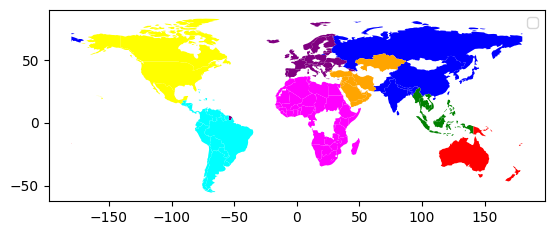

In [103]:
#Step 11: Plot the Map, associating each Region with a color
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define a color dictionary for each region
region_colors = {
    'Indo-NorthAsia': 'blue',
    'South-Asia': 'green',
    'Oceania': 'red',
    'Europe': 'purple',
    'Middle East': 'orange',
    'North America': 'yellow',
    'South America': 'cyan',
    'Africa': 'magenta',
    'Unknown': 'gray'  # If entity doesn't belong to any region
}

# Plot each region with its respective color
for region, color in region_colors.items():
    if region != 'Unknown':
        region_data = world[world['name'].isin(region_mapping[region])]
        region_data.plot(ax=plt.gca(), color=color, label=region)

# Add legend
plt.legend()

# Show plot
plt.show()

In [104]:
#Step 12: Group the DataFrame by the "Regions" column and sum the "Mis_Plastic_waste_(kg)" column
total_waste_per_region = PlasticWastePC.groupby("Regions")["Mis_Plastic_waste_(kg)"].sum()

print("Total Mis_Plastic_waste_(kg) per Regions:")
print(total_waste_per_region)


Total Mis_Plastic_waste_(kg) per Regions:
Regions
Africa             4.216476
Europe             0.752584
Indo-NorthAsia     0.799804
Middle East        0.327380
North America      0.041278
Oceania            1.312306
South America     18.618788
South-Asia         7.432661
Unknown            0.699034
Name: Mis_Plastic_waste_(kg), dtype: float64


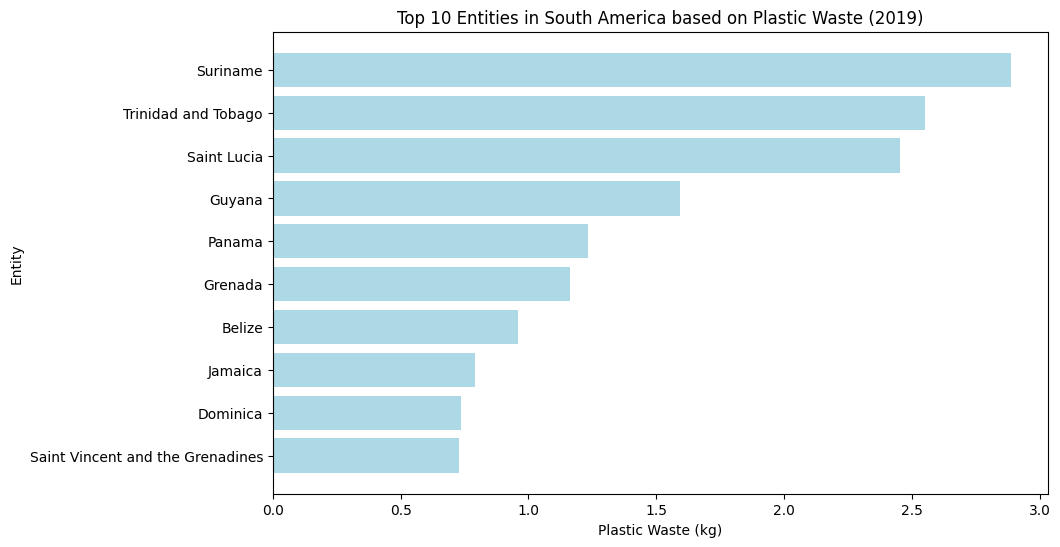

Ranking of entities in South America based on plastic waste for 2019:
                               Entity  Mis_Plastic_waste_(kg)  Rank
143                          Suriname                2.886403     1
151               Trinidad and Tobago                2.549821     2
125                       Saint Lucia                2.453552     3
61                             Guyana                1.591315     4
113                            Panama                1.233396     5
56                            Grenada                1.160714     6
13                             Belize                0.958974     7
73                            Jamaica                0.791723     8
36                           Dominica                0.736111     9
126  Saint Vincent and the Grenadines                0.729730    10
62                              Haiti                0.615200    11
37                 Dominican Republic                0.584412    12
58                          Guatemala         

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'South America' region
south_america_entities = ['Grenada', 'Saint Vincent and the Grenadines', 'Saint Lucia', 'Saint Kitts and Nevis', 'Guadeloupe', 'French Guiana', 'Martinique', 'Dominican Republic', 'Dominica', 'Nicaragua', 'Panama', 'Guatemala', 'Brazil', 'Belize', 'Argentina', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Chile', 'Peru', 'Colombia', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'Costa Rica', 'Trinidad and Tobago', 'El Salvador', 'Haiti', 'Honduras', 'Jamaica', 'Puerto Rico']

# Filter the dataset for the 'South America' region and 2019
south_america_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'South America') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
south_america_2019_sorted = south_america_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
south_america_2019_sorted['Rank'] = range(1, len(south_america_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = south_america_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='lightblue')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in South America based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in South America based on plastic waste for 2019:")
print(south_america_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])

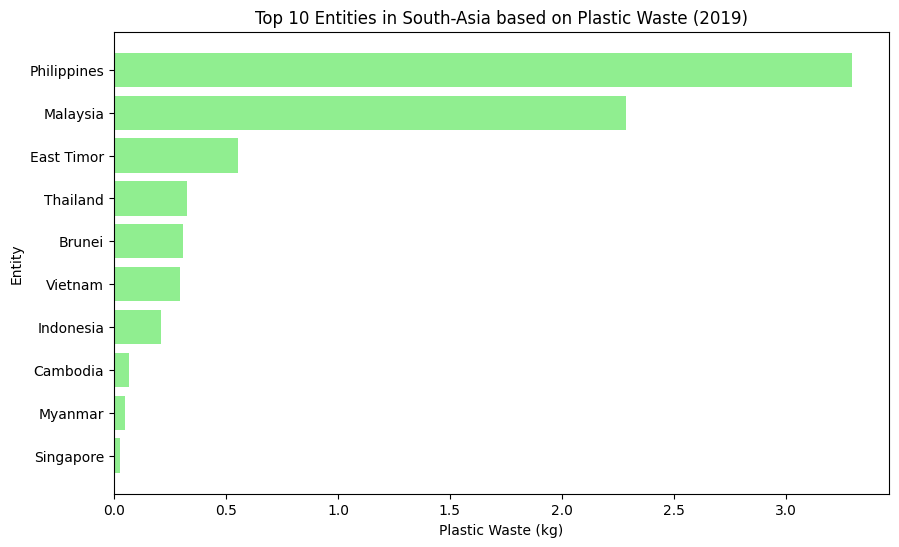

Ranking of entities in South-Asia based on plastic waste for 2019:
          Entity  Mis_Plastic_waste_(kg)  Rank
116  Philippines                3.296161     1
87      Malaysia                2.287887     2
38    East Timor                0.552978     3
148     Thailand                0.327550     4
17        Brunei                0.309469     5
160      Vietnam                0.292561     6
67     Indonesia                0.208158     7
20      Cambodia                0.067508     8
99       Myanmar                0.047072     9
133    Singapore                0.028256    10
64     Hong Kong                0.015062    11


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming PlasticWastePC is your DataFrame containing the dataset

# Define the list of entities in the 'South-Asia' region
south_asia_entities = ['East Timor', 'Thailand', 'Myanmar', 'Malaysia', 'Indonesia', 'Vietnam', 'Brunei', 'Cambodia', 'Philippines', 'Singapore', 'Hong Kong']

# Filter the dataset for the 'South-Asia' region and 2019
south_asia_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'South-Asia') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
south_asia_2019_sorted = south_asia_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
south_asia_2019_sorted['Rank'] = range(1, len(south_asia_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = south_asia_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='lightgreen')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in South-Asia based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in South-Asia based on plastic waste for 2019:")
print(south_asia_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])


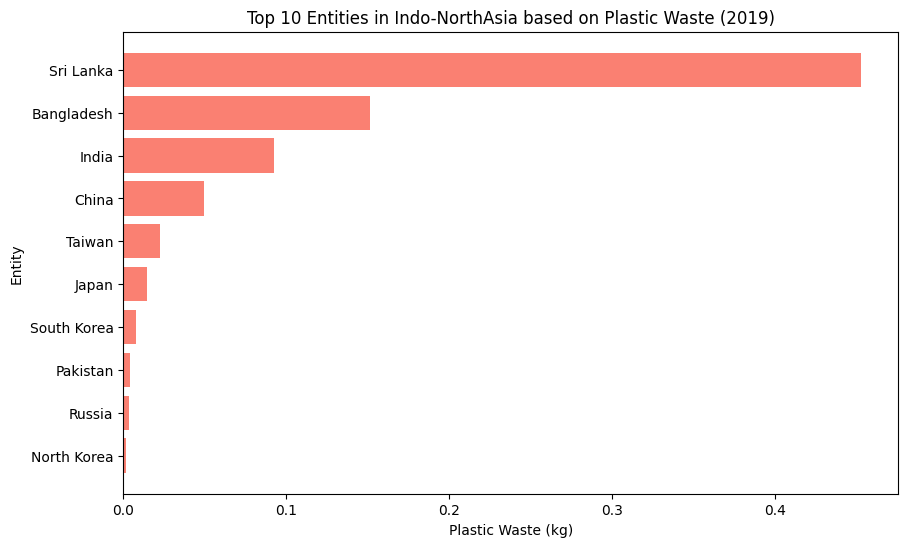

Ranking of entities in Indo-NorthAsia based on plastic waste for 2019:
          Entity  Mis_Plastic_waste_(kg)  Rank
141    Sri Lanka                0.452729     1
10    Bangladesh                0.151123     2
66         India                0.092587     3
25         China                0.049315     4
146       Taiwan                0.022335     5
74         Japan                0.014465     6
139  South Korea                0.007555     7
110     Pakistan                0.004031     8
123       Russia                0.003716     9
106  North Korea                0.001948    10
88      Maldives                0.000000    11


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'Indo-NorthAsia' region
indo_north_asia_entities = ['India', 'China', 'Japan', 'South Korea', 'Pakistan', 'Taiwan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'North Korea', 'Russia']

# Filter the dataset for the 'Indo-NorthAsia' region and 2019
indo_north_asia_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'Indo-NorthAsia') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
indo_north_asia_2019_sorted = indo_north_asia_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
indo_north_asia_2019_sorted['Rank'] = range(1, len(indo_north_asia_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = indo_north_asia_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='salmon')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in Indo-NorthAsia based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in Indo-NorthAsia based on plastic waste for 2019:")
print(indo_north_asia_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])

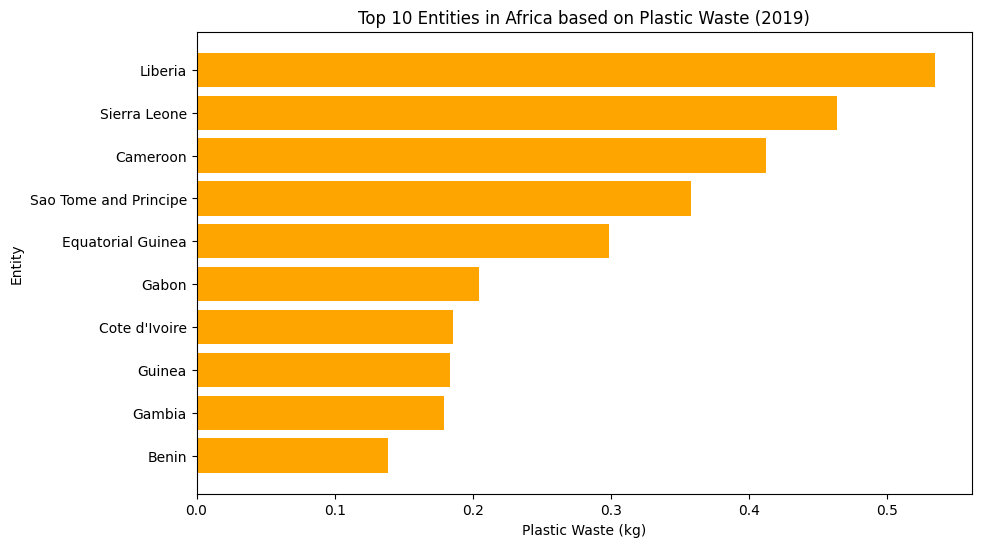

Ranking of entities in Africa based on plastic waste for 2019:
                           Entity  Mis_Plastic_waste_(kg)  Rank
83                        Liberia                0.534333     1
132                  Sierra Leone                0.463842     2
21                       Cameroon                0.412390     3
128         Sao Tome and Principe                0.358140     4
42              Equatorial Guinea                0.298673     5
50                          Gabon                0.204786     6
30                  Cote d'Ivoire                0.186025     7
59                         Guinea                0.183776     8
51                         Gambia                0.179302     9
14                          Benin                0.138887    10
54                          Ghana                0.137583    11
2                         Algeria                0.134114    12
84                          Libya                0.129703    13
60                  Guinea-Bissau        

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'Africa' region
africa_entities = ['Togo', 'Libya', 'Nigeria', 'South Africa', 'Egypt', 'Algeria', 'Kenya', 'Ethiopia', 'Morocco', 'Western Sahara', 'Zimbabwe', 'Angola', 'Benin', 'Sudan', 'Ghana', 'Uganda', 'Angola', 'Tanzania', 'Zambia', 'Mozambique', 'Cameroon', 'Côte d\'Ivoire', 'Madagascar', 'Guinea', 'Senegal', 'Benin', 'Tunisia', 'Chad', 'Somalia', 'Rwanda', 'Burundi', 'Mali', 'Niger', 'Malawi', 'Liberia', 'Mauritania', 'Botswana', 'Lesotho', 'Gambia', 'Gabon', 'Namibia', 'Central African Republic', 'Sierra Leone', 'Eritrea', 'Congo', 'Mauritius', 'Reunion', 'Swaziland', 'Djibouti', 'Comoros', 'Equatorial Guinea', 'Guinea-Bissau', 'Sao Tome and Principe', 'Seychelles', 'Saint Helena', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Democratic Republic of Congo']

# Filter the dataset for the 'Africa' region and 2019
africa_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'Africa') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
africa_2019_sorted = africa_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
africa_2019_sorted['Rank'] = range(1, len(africa_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = africa_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='orange')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in Africa based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in Africa based on plastic waste for 2019:")
print(africa_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])


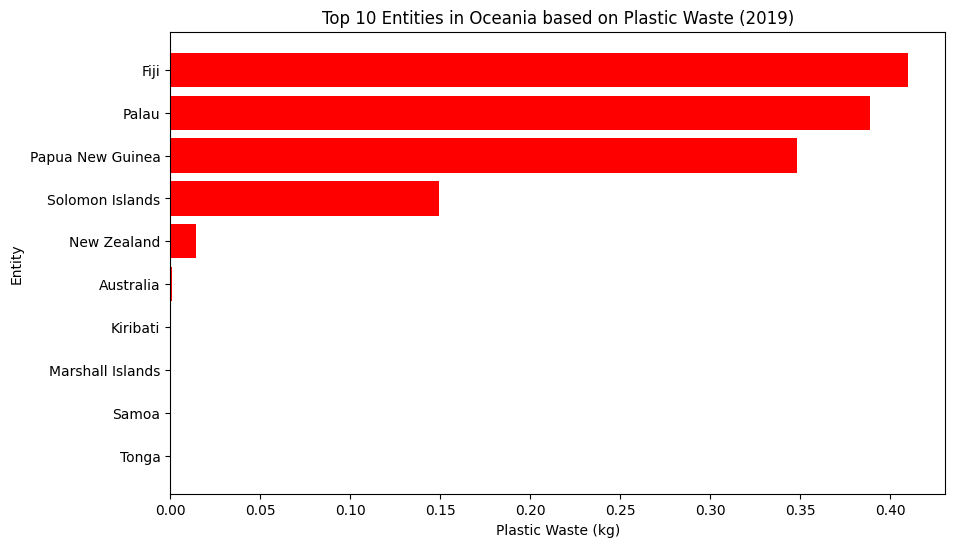

Ranking of entities in Oceania based on plastic waste for 2019:
               Entity  Mis_Plastic_waste_(kg)  Rank
46               Fiji                0.410112     1
111             Palau                0.388889     2
114  Papua New Guinea                0.348564     3
136   Solomon Islands                0.149254     4
102       New Zealand                0.014217     5
7           Australia                0.001270     6
78           Kiribati                0.000000     7
90   Marshall Islands                0.000000     8
127             Samoa                0.000000     9
150             Tonga                0.000000    10


In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'Oceania' region
oceania_entities = ['Solomon Islands', 'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Marshall Islands', 'Tonga', 'Kiribati', 'Palau', 'Samoa']

# Filter the dataset for the 'Oceania' region and 2019
oceania_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'Oceania') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
oceania_2019_sorted = oceania_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
oceania_2019_sorted['Rank'] = range(1, len(oceania_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = oceania_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='red')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in Oceania based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in Oceania based on plastic waste for 2019:")
print(oceania_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])


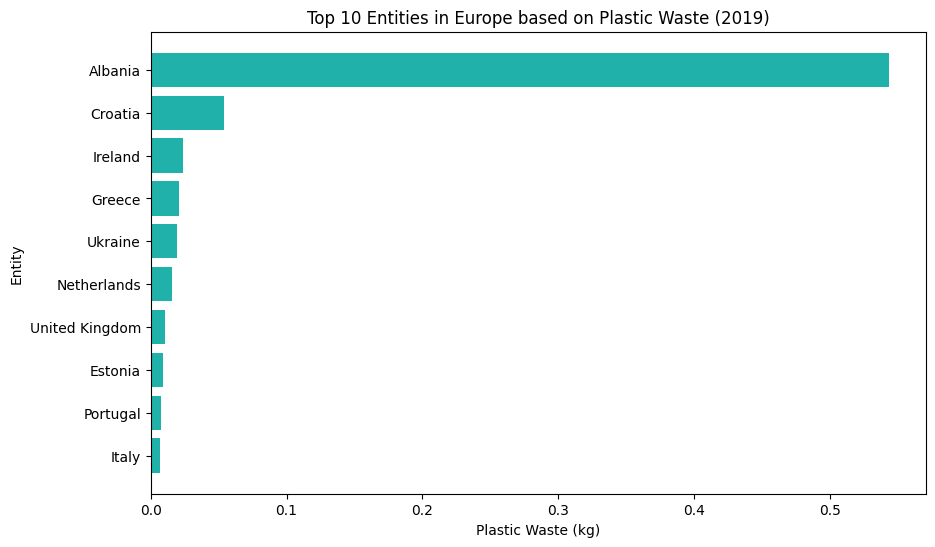

Ranking of entities in Europe based on plastic waste for 2019:
                     Entity  Mis_Plastic_waste_(kg)  Rank
1                   Albania                0.543214     1
31                  Croatia                0.054237     2
70                  Ireland                0.023556     3
55                   Greece                0.020624     4
154                 Ukraine                0.019525     5
101             Netherlands                0.015851     6
156          United Kingdom                0.010410     7
44                  Estonia                0.009050     8
118                Portugal                0.007432     9
72                    Italy                0.006837    10
135                Slovenia                0.005291    11
140                   Spain                0.005028    12
80                   Latvia                0.004719    13
122                 Romania                0.004131    14
48                   France                0.003608    15
144      

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'Europe' region
europe_entities = ['Montenegro', 'Albania', 'Bosnia and Herzegovina', 'Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Netherlands', 'Switzerland', 'Sweden', 'Norway', 'Finland', 'Belgium', 'Austria', 'Greece', 'Denmark', 'Czech Republic', 'Portugal', 'Poland', 'Hungary', 'Romania', 'Ireland', 'Slovakia', 'Croatia', 'Estonia', 'Slovenia', 'Lithuania', 'Latvia', 'Cyprus', 'Luxembourg', 'Malta', 'Iceland', 'Liechtenstein', 'Monaco', 'San Marino', 'Andorra', 'Vatican City', 'Bulgaria', 'Ukraine', 'Georgia']

# Filter the dataset for the 'Europe' region and 2019
europe_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'Europe') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
europe_2019_sorted = europe_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
europe_2019_sorted['Rank'] = range(1, len(europe_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = europe_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='lightseagreen')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in Europe based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in Europe based on plastic waste for 2019:")
print(europe_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])


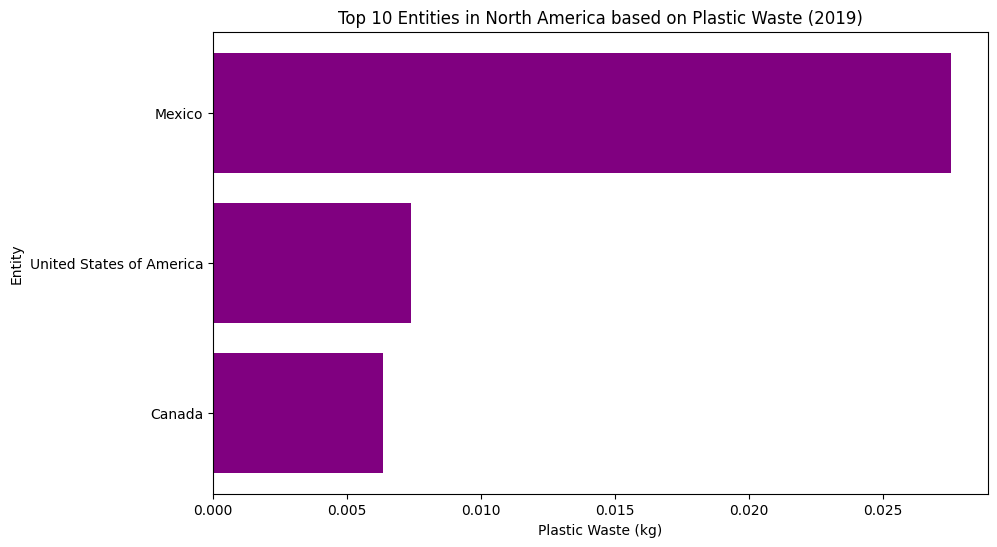

Ranking of entities in North America based on plastic waste for 2019:
                       Entity  Mis_Plastic_waste_(kg)  Rank
94                     Mexico                0.027529     1
157  United States of America                0.007388     2
22                     Canada                0.006362     3


In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'Oceania' region
north_america_entities = ['United States', 'Canada', 'Mexico']

# Filter the dataset for the 'North America' region and 2019
north_america_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'North America') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
north_america_2019_sorted = north_america_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
north_america_2019_sorted['Rank'] = range(1, len(north_america_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = north_america_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='purple')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in North America based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in North America based on plastic waste for 2019:")
print(north_america_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])


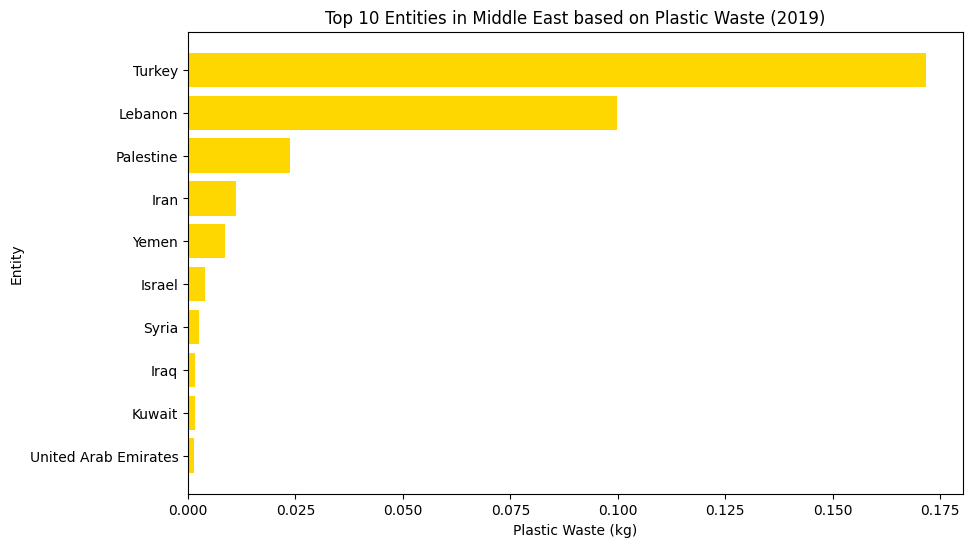

Ranking of entities in Middle East based on plastic waste for 2019:
                   Entity  Mis_Plastic_waste_(kg)  Rank
153                Turkey                0.171749     1
81                Lebanon                0.099767     2
112             Palestine                0.023690     3
68                   Iran                0.011192     4
163                 Yemen                0.008641     5
71                 Israel                0.003874     6
145                 Syria                0.002578     7
69                   Iraq                0.001704     8
79                 Kuwait                0.001664     9
155  United Arab Emirates                0.001433    10
76             Kazakhstan                0.000701    11
109                  Oman                0.000201    12
75                 Jordan                0.000099    13
129          Saudi Arabia                0.000087    14
9                 Bahrain                0.000000    15
120                 Qatar           

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of entities in the 'Middle East' region
middle_east_entities = ['Palestine', 'Saudi Arabia', 'Turkey', 'Iran', 'United Arab Emirates', 'Kazakhstan', 'Iraq', 'Israel', 'Yemen', 'Bahrain', 'Jordan', 'Lebanon', 'Syria', 'Kuwait', 'Oman', 'Qatar']

# Filter the dataset for the 'Middle East' region and 2019
middle_east_2019 = PlasticWastePC[(PlasticWastePC['Regions'] == 'Middle East') & (PlasticWastePC['Year'] == 2019)]

# Sort the filtered dataset by "Mis_Plastic_waste_(kg)" in descending order
middle_east_2019_sorted = middle_east_2019.sort_values(by='Mis_Plastic_waste_(kg)', ascending=False)

# Add a ranking column
middle_east_2019_sorted['Rank'] = range(1, len(middle_east_2019_sorted) + 1)

# Get the top N entities (for better visualization)
top_n = 10  # You can adjust this number as needed
top_entities = middle_east_2019_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_entities['Entity'], top_entities['Mis_Plastic_waste_(kg)'], color='gold')
plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top {} Entities in Middle East based on Plastic Waste (2019)'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Display the ranking
print("Ranking of entities in Middle East based on plastic waste for 2019:")
print(middle_east_2019_sorted[['Entity', 'Mis_Plastic_waste_(kg)', 'Rank']])


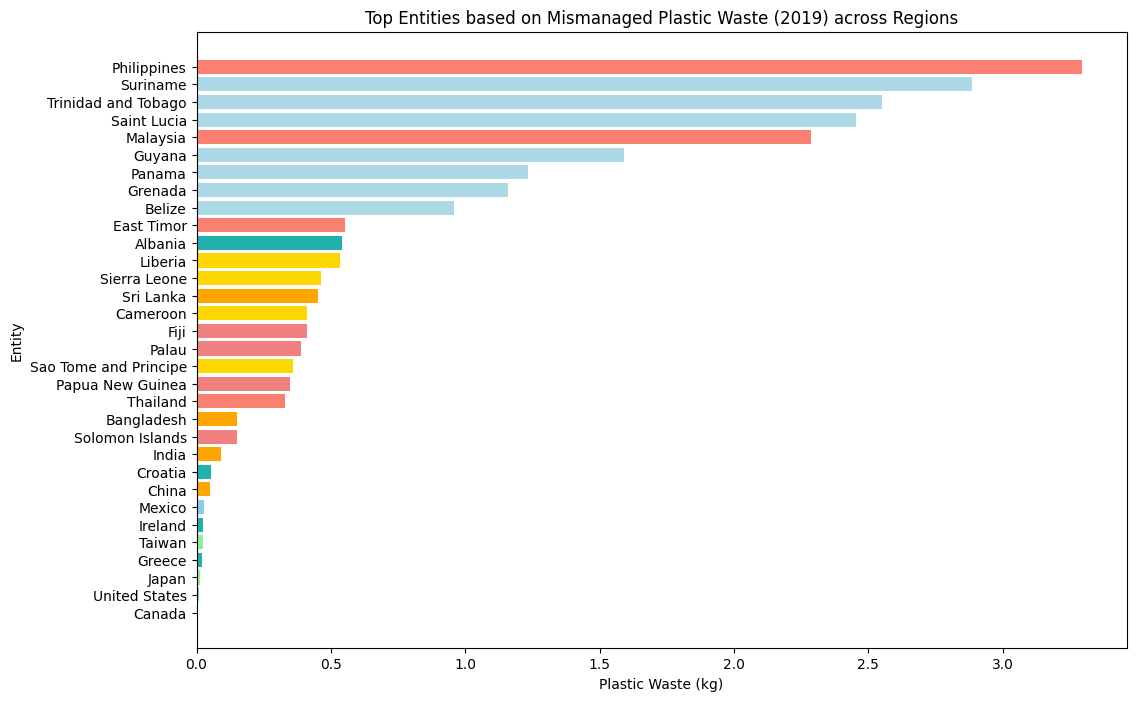

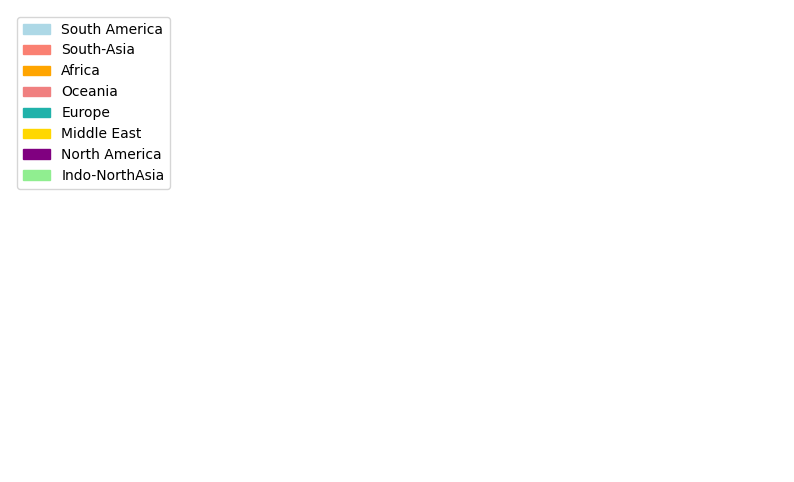

In [113]:
import matplotlib.pyplot as plt

# Define the provided results
results = {
    'South America': [
        {'Entity': 'Suriname', 'Mis_Plastic_waste_(kg)': 2.886403, 'Rank': 1},
        {'Entity': 'Trinidad and Tobago', 'Mis_Plastic_waste_(kg)': 2.549821, 'Rank': 2},
        {'Entity': 'Saint Lucia', 'Mis_Plastic_waste_(kg)': 2.453552, 'Rank': 3},
        {'Entity': 'Guyana', 'Mis_Plastic_waste_(kg)': 1.591315, 'Rank': 4},
        {'Entity': 'Panama', 'Mis_Plastic_waste_(kg)': 1.233396, 'Rank': 5},
        {'Entity': 'Grenada', 'Mis_Plastic_waste_(kg)': 1.160714, 'Rank': 6},
        {'Entity': 'Belize', 'Mis_Plastic_waste_(kg)': 0.958974, 'Rank': 7}
    ],
    'South-Asia': [
        {'Entity': 'Philippines', 'Mis_Plastic_waste_(kg)': 3.296161, 'Rank': 1},
        {'Entity': 'Malaysia', 'Mis_Plastic_waste_(kg)': 2.287887, 'Rank': 2},
        {'Entity': 'East Timor', 'Mis_Plastic_waste_(kg)': 0.552978, 'Rank': 3},
        {'Entity': 'Thailand', 'Mis_Plastic_waste_(kg)': 0.327550, 'Rank': 4}
    ],
    'Africa': [
        {'Entity': 'Sri Lanka', 'Mis_Plastic_waste_(kg)': 0.452729, 'Rank': 1},
        {'Entity': 'Bangladesh', 'Mis_Plastic_waste_(kg)': 0.151123, 'Rank': 2},
        {'Entity': 'India', 'Mis_Plastic_waste_(kg)': 0.092587, 'Rank': 3},
        {'Entity': 'China', 'Mis_Plastic_waste_(kg)': 0.049315, 'Rank': 4}
    ],
    'Middle East': [
        {'Entity': 'Liberia', 'Mis_Plastic_waste_(kg)': 0.534333, 'Rank': 1},
        {'Entity': 'Sierra Leone', 'Mis_Plastic_waste_(kg)': 0.463842, 'Rank': 2},
        {'Entity': 'Cameroon', 'Mis_Plastic_waste_(kg)': 0.412390, 'Rank': 3},
        {'Entity': 'Sao Tome and Principe', 'Mis_Plastic_waste_(kg)': 0.358140, 'Rank': 4}
    ],
    'Oceania': [
        {'Entity': 'Fiji', 'Mis_Plastic_waste_(kg)': 0.410112, 'Rank': 1},
        {'Entity': 'Palau', 'Mis_Plastic_waste_(kg)': 0.388889, 'Rank': 2},
        {'Entity': 'Papua New Guinea', 'Mis_Plastic_waste_(kg)': 0.348564, 'Rank': 3},
        {'Entity': 'Solomon Islands', 'Mis_Plastic_waste_(kg)': 0.149254, 'Rank': 4}
    ],
    'Europe': [
        {'Entity': 'Albania', 'Mis_Plastic_waste_(kg)': 0.543214, 'Rank': 1},
        {'Entity': 'Croatia', 'Mis_Plastic_waste_(kg)': 0.054237, 'Rank': 2},
        {'Entity': 'Ireland', 'Mis_Plastic_waste_(kg)': 0.023556, 'Rank': 3},
        {'Entity': 'Greece', 'Mis_Plastic_waste_(kg)': 0.020624, 'Rank': 4}
    ],
    'North America': [
        {'Entity': 'Mexico', 'Mis_Plastic_waste_(kg)': 0.027529, 'Rank': 1},
        {'Entity': 'United States', 'Mis_Plastic_waste_(kg)': 0.007388, 'Rank': 2},
        {'Entity': 'Canada', 'Mis_Plastic_waste_(kg)': 0.006362, 'Rank': 3}
    ],
    'Indo-NorthAsia': [
        {'Entity': 'Sri Lanka', 'Mis_Plastic_waste_(kg)': 0.452729, 'Rank': 1},
        {'Entity': 'Bangladesh', 'Mis_Plastic_waste_(kg)': 0.151123, 'Rank': 2},
        {'Entity': 'India', 'Mis_Plastic_waste_(kg)': 0.092587, 'Rank': 3},
        {'Entity': 'China', 'Mis_Plastic_waste_(kg)': 0.049315, 'Rank': 4},
        {'Entity': 'Taiwan', 'Mis_Plastic_waste_(kg)': 0.022335, 'Rank': 5},
        {'Entity': 'Japan', 'Mis_Plastic_waste_(kg)': 0.014465, 'Rank': 6}
    ]
}

# Combine all results into one list
all_results = []
for region, entities in results.items():
    for entity in entities:
        all_results.append(entity)

# Sort all results by 'Mis_Plastic_waste_(kg)' in descending order
all_results.sort(key=lambda x: x['Mis_Plastic_waste_(kg)'], reverse=True)

# Assigning colors
colors = {
    'South America': 'lightblue',
    'South-Asia': 'salmon',
    'Africa': 'orange',
    'Oceania': 'lightcoral',
    'Europe': 'lightseagreen',
    'Middle East': 'gold',
    'North America': 'skyblue',  # Adding color for North America
    'Indo-NorthAsia': 'lightgreen'  # Adding color for Indo-NorthAsia
}

# Plotting bar chart
plt.figure(figsize=(12, 8))
for result in all_results:
    region = [key for key, value in results.items() if result in value][0]  # Find region of the current entity
    plt.barh(result['Entity'], result['Mis_Plastic_waste_(kg)'], color=colors[region])

plt.xlabel('Plastic Waste (kg)')
plt.ylabel('Entity')
plt.title('Top Entities based on Mismanaged Plastic Waste (2019) across Regions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()



import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the colors dictionary
colors = {
    'South America': 'lightblue',
    'South-Asia': 'salmon',
    'Africa': 'orange',
    'Oceania': 'lightcoral',
    'Europe': 'lightseagreen',
    'Middle East': 'gold',
    'North America': 'purple',  # Adding color for North America
    'Indo-NorthAsia': 'lightgreen'  # Adding color for Indo-NorthAsia
}

# Create an empty legend list
legend_patches = []

# Plotting empty bars to create legend entries
for region, color in colors.items():
    legend_patches.append(Patch(color=color, label=region))

# Plotting the legend
plt.figure(figsize=(10, 6))
plt.legend(handles=legend_patches, loc='upper left')
plt.axis('off')  # Turn off the axis to only display the legend
plt.show()

####**DATASET #2**

In [114]:
# Step 2. Importing the dataset and reading the Excel file into a dataframe
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path2 = "/content/drive/MyDrive/Equitable Justice Lab/Next_-per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.xlsx"
PlasticPerCapita = pd.read_excel(path2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
PlasticPerCapita.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [116]:
# Filter rows based on the "Entity" column
selected_countries = ["Philippines", "Timor", "Malaysia", "Suriname", "Trinidad and Tobago", "Saint Lucia", "Guyana", "Panama", "Grenada", "Belize"]
subset_PlasticPerCapita = PlasticPerCapita[PlasticPerCapita['Entity'].isin(selected_countries)]

# Select only the desired columns
subset_PlasticPerCapita = subset_PlasticPerCapita[["Entity", "Year", "Per capita mismanaged plastic waste", "GDP per capita, PPP (constant 2011 international $)", "Total population (Gapminder, HYDE & UN)"]]

# Print the resulting subset dataset
print(subset_PlasticPerCapita)


                    Entity  Year  Per capita mismanaged plastic waste  \
4228                Belize  2010                                0.053   
4229                Belize  1990                                  NaN   
4230                Belize  1991                                  NaN   
4231                Belize  1992                                  NaN   
4232                Belize  1993                                  NaN   
...                    ...   ...                                  ...   
43732  Trinidad and Tobago  1987                                  NaN   
43733  Trinidad and Tobago  1988                                  NaN   
43734  Trinidad and Tobago  1989                                  NaN   
43735  Trinidad and Tobago  2018                                  NaN   
43736  Trinidad and Tobago  2019                                  NaN   

       GDP per capita, PPP (constant 2011 international $)  \
4228                                         7876.809586     

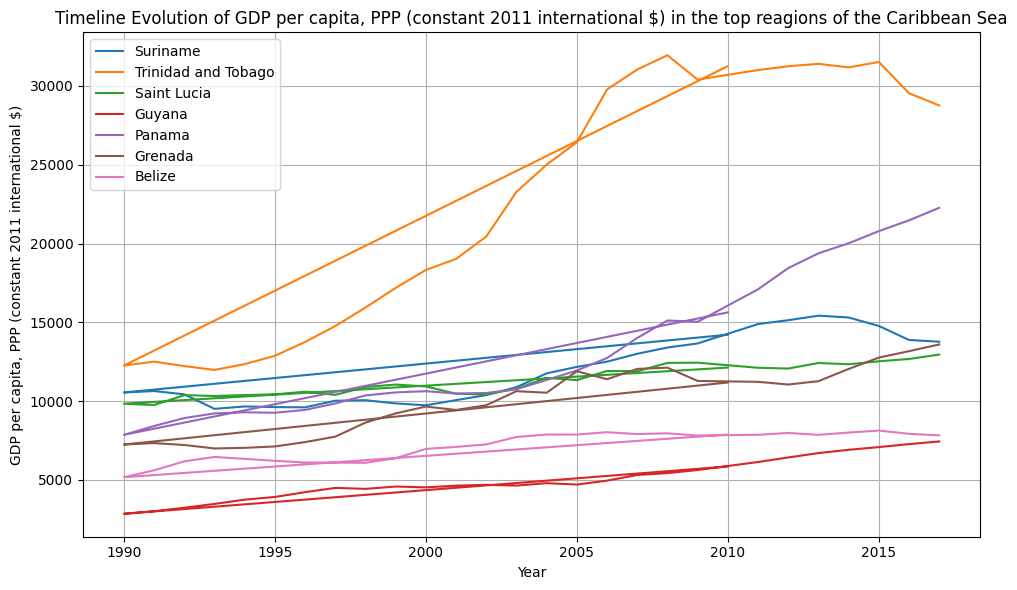

In [117]:
import matplotlib.pyplot as plt

# Define the list of entities
entities = ["Suriname", "Trinidad and Tobago", "Saint Lucia", "Guyana", "Panama", "Grenada", "Belize"]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each entity
for entity in entities:
    # Filter data for the current entity
    entity_data = subset_PlasticPerCapita[subset_PlasticPerCapita['Entity'] == entity]

    # Plot the data
    ax.plot(entity_data['Year'], entity_data['GDP per capita, PPP (constant 2011 international $)'], label=entity)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita, PPP (constant 2011 international $)')
ax.set_title('Timeline Evolution of GDP per capita, PPP (constant 2011 international $) in the top reagions of the Caribbean Sea')
ax.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

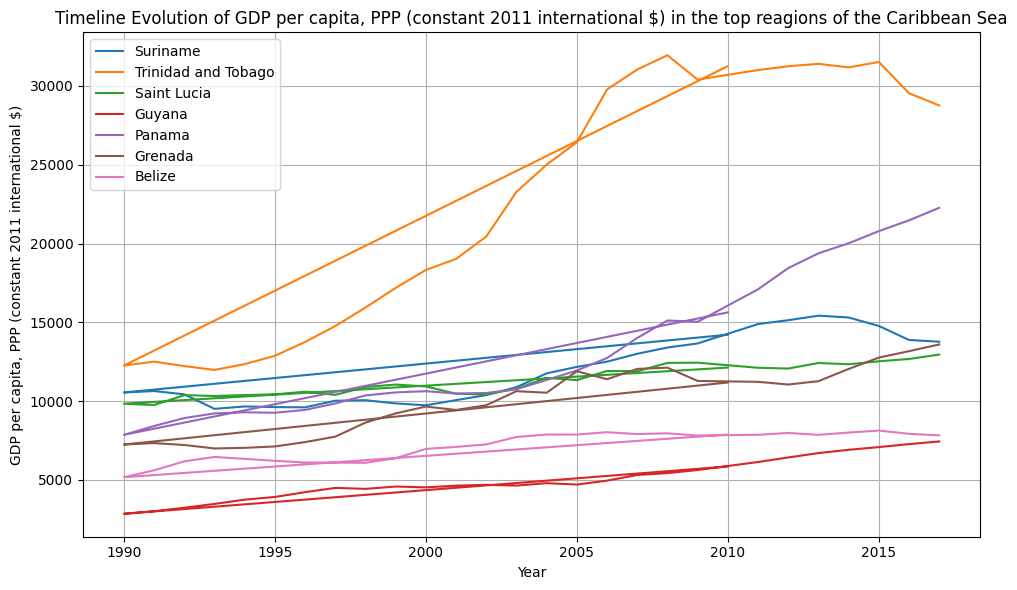

In [118]:
import matplotlib.pyplot as plt

# Define the list of entities
entities = ["Suriname", "Trinidad and Tobago", "Saint Lucia", "Guyana", "Panama", "Grenada", "Belize"]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each entity
for entity in entities:
    # Filter data for the current entity
    entity_data = subset_PlasticPerCapita[subset_PlasticPerCapita['Entity'] == entity]

    # Plot the data
    ax.plot(entity_data['Year'], entity_data['GDP per capita, PPP (constant 2011 international $)'], label=entity)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita, PPP (constant 2011 international $)')
ax.set_title('Timeline Evolution of GDP per capita, PPP (constant 2011 international $) in the top reagions of the Caribbean Sea')
ax.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()